<a href="https://colab.research.google.com/github/slapazromero/EjercicioNumpy/blob/main/Ejercicio_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://codeshare.io/piaizv

In [2]:
import numpy as np
from PIL import Image
from random import randint

In [1]:
class ImagenNumPy:

  @staticmethod
  def crear_imagen(alto = 100, ancho = 100, color = [0, 0, 0], pintar = True):
    data = np.zeros((alto, ancho, len(color)), dtype = np.uint8)
    data[0:alto, 0:ancho] = color
    return ImagenNumPy._pintar_imagen(data, pintar)

  @staticmethod
  def crear_collab(elementos_h = 5, elementos_v = 3, alto = 100, ancho = 100, pintar = True):
    for y in range(elementos_v):
      fila = ImagenNumPy.crear_imagen(alto, ancho, (randint(0, 255), randint(0, 255), randint(0, 255)), False)
      
      for x in range(elementos_h - 1):
        fila = np.hstack([fila, ImagenNumPy.crear_imagen(alto, ancho, (randint(0, 255), randint(0, 255), randint(0, 255)), False)])
      
      if 'data' in locals() :
        data = np.vstack([data, fila])
      
      else:
        data = np.vstack([fila,])
    
    return ImagenNumPy._pintar_imagen(data, pintar)

  @staticmethod
  def redimensionar_imagen(data, alto, ancho, pintar = True):
    img = ImagenNumPy._cambiar_formato_image(data)
    img = img.resize((ancho, alto))
    
    data = ImagenNumPy._cambiar_formato_np(img)
    return ImagenNumPy._pintar_imagen(data, pintar)

  @staticmethod
  def redimensionar_imagen_ancho(data, nuevo_ancho, pintar = True):
    img = ImagenNumPy._cambiar_formato_image(data)
    img = ImagenNumPy.redimensionar_imagen(data, ImagenNumPy._calcular_altura(data, nuevo_ancho), nuevo_ancho)
    
    data = ImagenNumPy._cambiar_formato_np(img)
    return ImagenNumPy._pintar_imagen(data, pintar)

  @staticmethod
  def redimensionar_imagen_alto(data, nuevo_alto, pintar = True):
    img = ImagenNumPy._cambiar_formato_image(data)
    img = ImagenNumPy.redimensionar_imagen(data, nuevo_alto, ImagenNumPy._calcular_ancho(data, nuevo_alto))
    
    data = ImagenNumPy._cambiar_formato_np(img)
    return ImagenNumPy._pintar_imagen(data, pintar)

  @staticmethod
  def recortar_trozo(data, ancho, alto, coordenadas = (0, 0), pintar = True):
    img = ImagenNumPy._cambiar_formato_image(data)
    data = ImagenNumPy._cambiar_formato_np(data)
    coor_x = coordenadas[0]
    coor_y = coordenadas[1]

    if coor_x >= img.width or coor_y >= img.height:
      print('Coordenadas superiores a la imagen')
      return ImagenNumPy._pintar_imagen(data, pintar)

    elif coor_x + ancho >= img.width or coor_y + alto >= img.height:
      data = data[coor_y : img.height, coor_x : img.width]
      return ImagenNumPy._pintar_imagen(data, pintar)

    else:
      data = data[coor_y : coor_y + alto, coor_x : coor_x + ancho]
      return ImagenNumPy._pintar_imagen(data, pintar)

  @staticmethod
  def _apilar_sin_deformar(data1, data2, horizontal = True):
    pass

  @staticmethod
  def _apilar_deformar(data1, data2, horizontal = True):
    pass


  @staticmethod
  def _cambiar_formato_np(data):
    if not isinstance(data, (np.ndarray, np.generic)):
      return np.asarray(data)
    else:
      return data

  @staticmethod
  def _cambiar_formato_image(data):
    if not isinstance(data, (np.ndarray, np.generic)):
      return data
    else:
      return Image.fromarray(data)

  @staticmethod
  def _pintar_imagen(data, pintar = True):
    data = ImagenNumPy._cambiar_formato_np(data)
    if pintar:
      return Image.fromarray(data)
    else:
      return data

  @staticmethod
  def _calcular_altura(data, ancho):
    img = Image.fromarray(data)
    return (img.height * ancho) // img.width

  @staticmethod
  def _calcular_ancho(data, alto):
    img = Image.fromarray(data)
    return (img.width * alto) // img.height

In [ ]:
ImagenNumPy.crear_imagen(200, 100, [145, 255, 0])

In [ ]:
ImagenNumPy.crear_collab(8, 3, 200, 100)

In [ ]:
imagen = ImagenNumPy.crear_imagen(150, 300, pintar=False)

ImagenNumPy.redimensionar_imagen(imagen, 300, 150)


In [ ]:
ImagenNumPy.redimensionar_imagen_ancho(imagen, 200)

In [ ]:
ImagenNumPy.redimensionar_imagen_alto(imagen, 200)

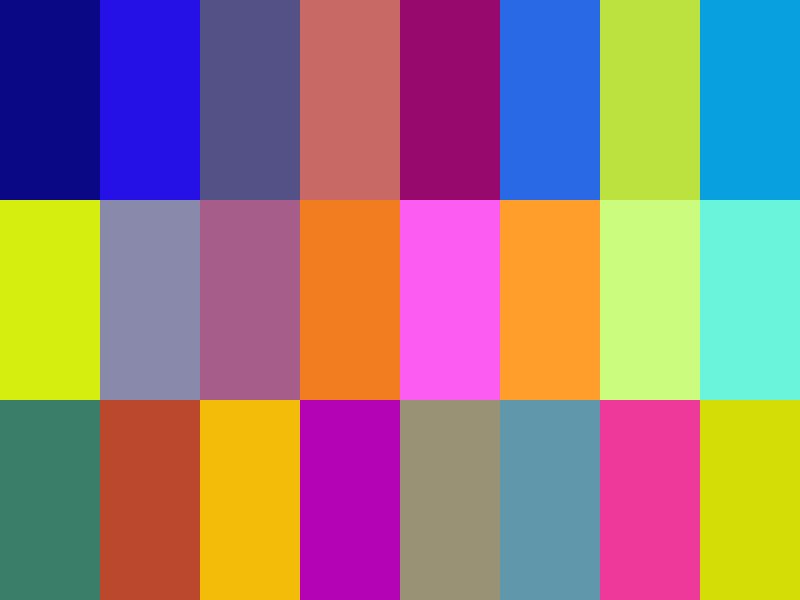

In [10]:
imagen = ImagenNumPy.crear_collab(8, 3, 200, 100)

imagen

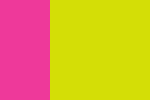

In [12]:
ImagenNumPy.recortar_trozo(imagen, 300, 300, (650, 500))